# Demo 08: Algorithms 04. Total variation minimization algorithms. 

This demo presents the total variation algorithms in TIGRE. Total variation algorithms try to minimize the variation (gradient) of the image, assuming its peicewise smooth, as most thigns in nature are (i.e human body)

This set of algorithms perform especially well when the noise is very significant or the number of projections is small, however, they require more computational time and memory than the other algorithms.

In [1]:
# Define geometry 
import tigre
import numpy as np
geo = tigre.geometry(mode='cone',default=True,high_quality = False)
print(geo)

TIGRE parameters
-----
Geometry parameters
Distance from source to detector (DSD) = 1536 mm
Distance from source to origin (DSO)= 1000 mm
-----
Detector parameters
Number of pixels (nDetector) = [128 128]
Size of each pixel (dDetector) = [3.2 3.2] mm
Total size of the detector (sDetector) = [409.6 409.6] mm
-----
Image parameters
Number of voxels (nVoxel) = [64 64 64]
Total size of the image (sVoxel) = [256 256 256] mm
Size of each voxel (dVoxel) = [4. 4. 4.] mm
-----
Offset correction parameters
Offset of image from origin (offOrigin) = [0 0 0] mm
Offset of detector (offDetector) = [0 0] mm
-----
Auxillary parameters
Samples per pixel of forward projection (accuracy) = 0.5
-----
Rotation of the Detector (rotDetector) = [0 0 0] rad


## Load data and generate projections 

In [2]:
from tigre.demos.Test_data import data_loader
angles = np.linspace(0,2*np.pi,100)
head = data_loader.load_head_phantom(geo.nVoxel)
proj = tigre.Ax(head,geo,angles)

## Lets create a OS-SART test for comparison

In [3]:
import tigre.algorithms as algs
imgOSSART = algs.ossart(proj,geo,angles,20,blocksize=10)


OSSART algorithm in progress.
Esitmated time until completetion (s): 21.39153


## Total Variation algorithms

In [4]:

#  Total Variation algorithms
# 
#   ASD-POCS: Adaptative Steeppest Descent-Projection On Convex Subsets
#   Often called POCS-TV
#  ==========================================================================
#  ==========================================================================
#    ASD-POCS minimizes At-B and the TV norm separately in each iteration,
#    i.e. reconstructs the image first and then reduces the TV norm, every
#    iteration. As the other algorithms the mandatory inputs are projections,
#    geometry, angles and maximum iterations.
#  
#   ASD-POCS has a veriety of optional arguments, and some of them are crucial
#   to determine the behaviour of the algorithm. The advantage of ASD-POCS is
#   the power to create good images from bad data, but it needs a lot of
#   tunning. 
#  
#    Optional parameters that are very relevant:
#   ----------------------------------------------
#      'maxl2err'    Maximum L2 error to accept an image as valid. This
#                    parameter is crucial for the algorithm, determines at
#                    what point an image should not be updated further.
#                    Default is 20% of the FDK L2 norm.
#                    
#   its called epsilon in the paper.

imgASDPOCS = algs.asd_pocs(proj,geo,angles,niter=20,tviter=25)

# For OS_ASD_POCS, one can simply change the blocksize and order strategy for algs.asd_pocs
imgOSASDPOCS = algs.asd_pocs(proj,geo,angles,niter=20,tviter=25,blocksize=20,OrderStrategy = 'random')

#    SART-TV 
# ==========================================================================
# ==========================================================================      
# 
#    This implementation differs more from the others, as it minimizes the
#    ROF model, i.e. when minimizing the total variation of the image, it
#    also takes into account the information of the image. If only the total
#    variation minimization step was run in the rest of the algorithms, the
#    result would be a flat image (as that is the minimum total variation
#    image), altertatively, the ROF model enforces the image not to change too
#    much.
#    
#    This algirths performs better with more projections, but noisy data, by
#    enforncing the TV very little
#   
#    The optional parameters are for the total variatiot part of the image:
# 
# 
#   
#    'tviter'       amoutn of iteration in theTV step. Default 50
#  
#    'tvlambda'     hyperparameter in TV iteration. IT gives the ratio of
#                   importance of the image vs the minimum total variation.
#                   default is 15. Lower means more TV denoising.
imgSARTTV = algs.ossart_tv(proj,geo,angles,niter=20,tviter=100,tvlambda=50,blocksize=20)

POCS Algorithm in progress.
Esitmated time until completetion (s): 195.110544

     Stop criteria met: 
     c = -0.99762905
     beta = 0.809727868221
     iter = 21



/home/reuben/TIGRE/Python/tigre/utilities/order_subsets.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return block_alpha[new_order],index_alpha[[new_order]]


POCS Algorithm in progress.
Esitmated time until completetion (s): 15.445043

     Stop criteria met: 
     c = -0.8667783
     beta = 0.809727868221
     iter = 21

OSSART_TV algorithm in progress.
Esitmated time until completetion (s): 14.590917


## plot results

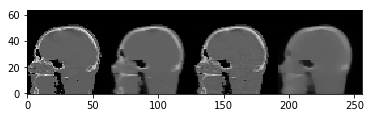

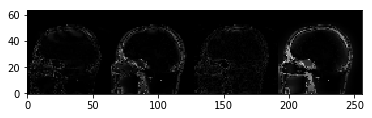

<tigre.utilities.plotimg.plotimg instance at 0x7f4524a174d0>

In [5]:
tigre.plotimg(np.hstack((imgASDPOCS,imgOSASDPOCS,imgOSSART,imgSARTTV)),slice=32)
tigre.plotimg(abs(np.hstack((imgASDPOCS-head,imgOSASDPOCS-head,imgOSSART-head,imgSARTTV-head))),slice=32)